In [11]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [6]:
alphas = [0,0.5,0.9,0.99,0.999,0.9999]
radii = [0.01, 0.1, 0.2, 0.3, 0.4, 1]
sens = [
    [12.39261786,14.98563841,16.78652666,18.53295251,19.71311857,24.82484794],
    [11.20384342,12.82834985,14.10436712,15.37426522,16.42690893,19.24757654],
    [5.774086926,7.35780595,9.236004669,11.53776988,13.49632275,22.0896],
    [2.619131289,5.032405034,7.493010417,9.987112358,13.82377028,20.35692068],
    [0.333013893,0.9790507125,1.910457389,2.821833965,3.505403598,5.151035188],
    [0.2367013233,0.2589050289,0.282686138,0.3048997828,0.314155579,0.3565864052]
]
sens_error = [
    [3.390824328,3.596967667,3.73128952,3.8764207,3.667936201,1.640702451],
    [2.904275634,3.04105521,2.854439036,2.766450548,2.53203622,0.7384067247],
    [2.83190829,3.156825571,4.061321304,4.732238779,4.556174655,2.9191],
    [3.795986139,6.603338158,8.056949015,8.544110628,8.075805295,0.9679060588],
    [0.6697311086,1.698361775,2.23720057,2.357456239,2.219752285,0.03493135014],
    [0.0726159129,0.06995225211,0.05970723952,0.05057004668,0.04182333304,0.01267664232]
]
sens = np.array(sens)
sens_error = np.array(sens_error) / 2

<ipython-input-7-3aa51171c72f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(alphas)


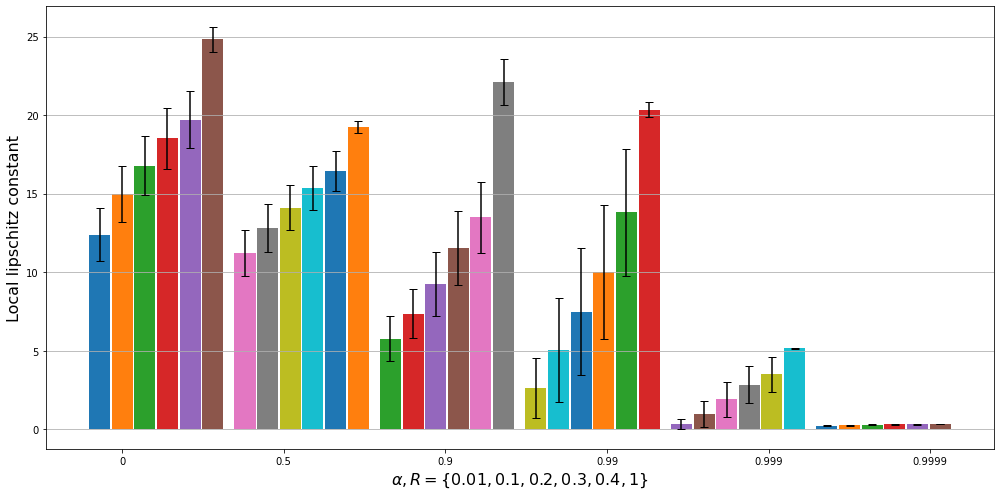

In [7]:
fig, ax = plt.subplots(figsize=(14,7))
alphas = [0,0.5,0.9,0.99,0.999,0.9999]

X_axis = np.arange(0, 10*len(alphas), 4.5)
for it, alpha in enumerate(alphas):
     for i, radius in enumerate(radii):
            ax.bar(X_axis[it] - 0.7*(1-i), sens[it, i], 0.65, yerr=sens_error[it, i], label = alpha, ecolor='black', capsize=4)
alphas.insert(0, 0)
ax.set_xticklabels(alphas)
ax.set_xlabel(r'$\alpha, R=\{0.01, 0.1, 0.2, 0.3, 0.4, 1\}$', fontsize=16)
ax.set_ylabel("Local lipschitz constant", fontsize=16)
ax.yaxis.grid(True, linestyle='-')
plt.tight_layout()
plt.savefig('figs/alpha_sens.pdf', dpi=400)

## Accuracy-SSIM trade-off with Eps VS Radius

In [12]:
acc_data = """
0.4885	0.2953	0.1862	0.1573	0.1451	0.1311
0.7104	0.4886	0.2862	0.2207	0.1879	0.1687
0.8483	0.7592	0.5771	0.427	0.3496	0.2866
0.8688	0.8426	0.7563	0.6608	0.5603	0.5019
"""
ssim_data = """
0.558326	0.427403	0.287169	0.231267	0.201815	0.179159
0.648793	0.553608	0.414173	0.328048	0.275686	0.229158
0.702451	0.655877	0.580114	0.499733	0.434049	0.380961
0.71085	0.700596	0.65671	0.610999	0.560295	0.517252
"""

In [13]:
acc_data = acc_data.split("\n")[1:-1]
ssim_data = ssim_data.split("\n")[1:-1]

In [17]:
radius = [0.1,0.2,0.4,0.6,0.8,1]
eps = [1,2,5,10]
e_r_acc = {}

for idx_e, e in enumerate(eps):
    e_r_acc[str(e)] = {}
    acc_e = acc_data[idx_e].split("\t")
    for idx_r, r in enumerate(radius):
        e_r_acc[str(e)][str(r)] = float(acc_e[idx_r])

In [18]:
e_r_ssim = {}
for idx_e, e in enumerate(eps):
    e_r_ssim[str(e)] = {}
    ssim_e = ssim_data[idx_e].split("\t")
    for idx_r, r in enumerate(radius):
        e_r_ssim[str(e)][str(r)] = float(ssim_e[idx_r])

Text(0, 0.5, 'Acc')

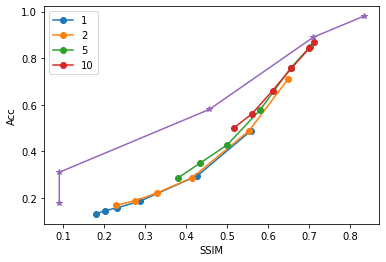

In [27]:
for e in eps:
    eps_data_acc = []
    eps_data_ssim = []
    for r in radius:
        eps_data_ssim.append(e_r_ssim[str(e)][str(r)])
        eps_data_acc.append(e_r_acc[str(e)][str(r)])
    plt.plot(eps_data_ssim, eps_data_acc, '-o', label=e)
    plt.legend()
plt.plot([0.09,0.09,0.45652,0.710468,0.83333], [0.18,0.31,0.58,0.89,0.98], '-*')
plt.xlabel("SSIM")
plt.ylabel("Acc")